In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
dataset=load_wine()

In [ ]:
df_wine=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df_wine['target']=dataset['target']
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(df_wine.loc[:,'alcohol':'proline'],df_wine.loc[:,'target'],test_size=0.30,random_state=1)

In [ ]:
print('Xtrain shape',xtrain.shape)
print('Xtest shape',xtest.shape)
print('Ytrain shape',ytrain.shape)
print('Ytest shape',ytest.shape)

Xtrain shape (124, 13)
Xtest shape (54, 13)
Ytrain shape (124,)
Ytest shape (54,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier( n_estimators=200)
model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
fi=model.feature_importances_

<BarContainer object of 13 artists>

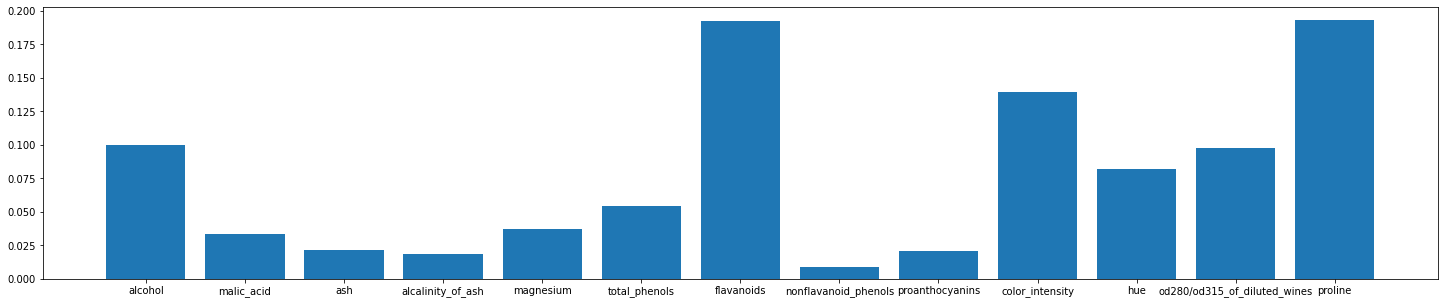

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
plt.bar(dataset['feature_names'],fi)

In [ ]:
import numpy as np
trainpredict=model.predict(xtrain)


In [ ]:
testpredict=model.predict(xtest)

In [ ]:
trainaccuracy=accuracy_score(ytrain,trainpredict)
print("train accuracy",trainaccuracy)

train accuracy 1.0


In [ ]:
testccuracy=accuracy_score(ytest,testpredict)
print("test accuracy",testccuracy)

test accuracy 0.9814814814814815


In [ ]:
cm=confusion_matrix(ytest,testpredict)
cm

array([[23,  0,  0],
       [ 1, 18,  0],
       [ 0,  0, 12]])

In [ ]:
param={'n_estimators':[100,150,200,250,300,350,400,450,500,550,600]}
opmodel=GridSearchCV(model,param,cv=10)
opmodel.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
opmodel.best_params_

{'n_estimators': 250}

In [ ]:
opmodel.best_score_

0.9916666666666666

In [ ]:
opmodel.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pv=opmodel.predict(xtest)

In [ ]:
accuracy_score(ytest,pv)

0.9814814814814815

In [ ]:
e=model.estimators_[10]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1318033053, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(e,feature_names=dataset.feature_names,class_names=dataset.target_names,rounded=True,precision=2,filled=True,
                out_file='tenthtree.dot')

In [ ]:
from subprocess import  call
call(['dot','-Tpng','tenthtree.dot','-o','tenthtree.png','-Gdpi=600'])

0

In [ ]:
from sklearn import tree
fig,axes=plt.subplots(1,5,figsize=(30,4),dpi=1000)
for i in range(0,5):
  tree.plot_tree(model.estimators_[i],feature_names=dataset.feature_names,class_names=dataset.target_names,
                 filled=True,precision=2,ax=axes[i])
  axes[i].set_title(" Decision Tree"+str(i))
fig.savefig("randomforest.png")